In [20]:
import os
from dotenv import load_dotenv
import psycopg2

# Load environment variables from the .env file (not included in github repo)
load_dotenv()
# Get the database URL from the environment variable
database_url = os.getenv('DATABASE_URL')

#query for all records with a non-null date_processed field and extract their domain and fear_safety score
with psycopg2.connect(dsn=database_url) as conn:
    with conn.cursor() as cur:
        cur.execute("""
        SELECT domain, diversity_of_source as fear_safety FROM news_stories
        WHERE date_processed IS NOT NULL;
        """)
        records = cur.fetchall()
        

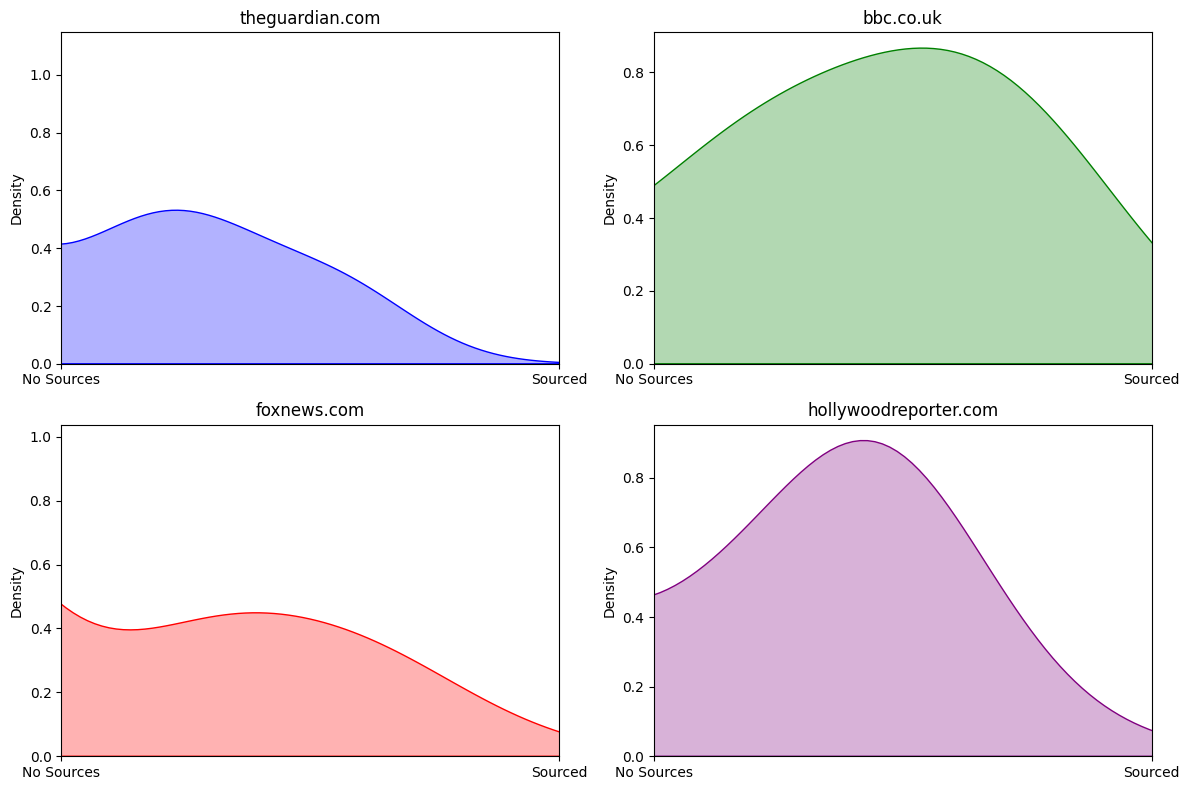

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data creation (replace this with your actual data)
# records = [('theguardian.com', 0.5), ('bbc.co.uk', -0.2), ('foxnews.com', -0.5), ('hollywoodreporter.com', 0.1)]

data = pd.DataFrame(records, columns=['domain', 'fear_safety'])

# Define the domains to plot
domains = ['theguardian.com', 'bbc.co.uk', 'foxnews.com', 'hollywoodreporter.com']
filtered_data = data[data['domain'].isin(domains)]

# Colors for each domain
colors = ['blue', 'green', 'red', 'purple']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Adjusted subplot grid
axs = axs.flatten()  # Flatten to 1D array for easier indexing

# Plotting each domain in its own subplot
for i, domain in enumerate(domains):
    subset = filtered_data[filtered_data['domain'] == domain]
    sns.kdeplot(subset['fear_safety'], ax=axs[i], fill=True, alpha=0.3, color=colors[i])
    axs[i].set_title(domain)
    axs[i].set_ylim(0,1)
    axs[i].set_xlim(0, 1)
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels(['No Sources', 'Sourced'])
    axs[i].set_xlabel('')  # Hide the x-axis label

plt.tight_layout()
plt.show()
